In [3]:
import os
import json
# change to results folder
os.environ['nnUNet_results'] = f'/home/nathan/Desktop/nnUNet/dataset/nnUNet_results'
os.environ['nnUNet_preprocessed'] = 'none'
os.environ['nnUNet_raw'] = 'none'

from nnunetv2.inference.predict_from_raw_data import predict_entry_point, predict_using_numpy

In [4]:
# load properties
with open('properties.json', 'r') as f:
    properties = json.load(f)

In [5]:
import SimpleITK as sitk
import numpy as np
input = sitk.GetArrayFromImage(sitk.ReadImage("/home/nathan/Desktop/nnUNet/dataset/nnUNet_raw/Dataset019_addedArt_cropped/imagesTr/neg_11_8_2_1_130_0000.nii.gz"))
true_mask = sitk.GetArrayFromImage(sitk.ReadImage("/home/nathan/Desktop/nnUNet/dataset/nnUNet_raw/Dataset019_addedArt_cropped/labelsTr/neg_11_8_2_1_130.nii.gz"))
image = np.expand_dims(input, axis=0)
# input must be a list of numpy arrays with size (1, 256, 256)
input = [image for _ in range(2)]

predictor = predict_using_numpy(input, '019', properties, c='2d', npp=2, nps=1, f = [0])

In [6]:
# grab masks
masks = predictor.grab_masks()

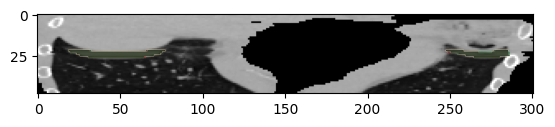

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(image.shape)
plt.imshow(image[0], cmap='gray', )
plt.imshow(masks[1][0], cmap='Reds', alpha=masks[1][0]*.5)
plt.imshow(true_mask, cmap='Greens', alpha=true_mask*.5)
plt.show()